# Preprocessing
##### Data from Sahel Jun-Aug 2020 in English

###### Import libraries and modules

In [1]:
#utilizzo dati twint tradotti inglese con data, pulito qui senza stemming e stop words + preprocessing e salvataggio con data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import plotly.offline as py
import plotly.express as px
import re
import nltk

In [2]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import *
from keras.utils.np_utils import to_categorical
from keras.initializers import Constant
from keras.models import Sequential
from keras.layers import Dense,Dropout, Activation, RepeatVector
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam,RMSprop
from keras.layers import LSTM, TimeDistributed
import re

import matplotlib.pyplot as plt
%matplotlib inline

###### Importing the dataset with TextBlob Sentiment

In [3]:
# Importing the dataset
#DATASET_COLUMNS  = ["sentiment", "ids", "date", "flag", "user", "text"]
DATASET_ENCODING = "ISO-8859-1"
dataset = pd.read_csv('../Sentiment_TextBlob/sahel_jun_aug_2020_en_all_clean_base_sentiment:textblob.csv',
                      encoding=DATASET_ENCODING)
dataset.head()

,Unnamed: 0,created_at,date,time,tweet,retweets_count,username,city,tweet_counts,day,...,mentions,num_hashtags,num_mentions,hour,cleaned_tweets,tweet_remove_url_men_hash,sentiment,subject,polarity,num_tweets
0,0,2020-08-31 01:59:10 CEST,2020-08-31 00:00:00,2021-11-14 01:59:10,@Sakiniah_bawa Wlhy or Ã°ÂÂ¤Â£ Ã°ÂÂ¤Â£ Ã°ÂÂ...,0.0,deejerh_n,Liptako,1.0,31,...,['@sakiniah_bawa'],0,1,1,wlhy,Wlhy or Ã°ÂÂ¤Â£ Ã°ÂÂ¤Â£ Ã°ÂÂ¤Â£,0.0,0.0,pos,1.0
1,1,2020-08-31 01:58:48 CEST,2020-08-31 00:00:00,2021-11-14 01:58:48,@ Jishaq1 @SKawaah_Bawa Haba Bross don't fall ...,0.0,deejerh_n,Liptako,1.0,31,...,['@skawaah_bawa'],0,1,1,jishaq haba bross fall hands,@ Jishaq1 Haba Bross don't fall for our hands,0.0,0.0,pos,1.0
2,2,2020-08-31 01:57:49 CEST,2020-08-31 00:00:00,2021-11-14 01:57:49,@Sakinah_bawa @ stresses ne 2k,0.0,deejerh_n,Liptako,1.0,31,...,['@sakinah_bawa'],0,1,1,stresses ne k,@ stresses ne 2k,0.0,0.0,pos,1.0
3,3,2020-08-31 01:50:46 CEST,2020-08-31 00:00:00,2021-11-14 01:50:46,@Al_ameen_yabo Ã°ÂÂÂÃ°ÂÂÂÃ°ÂÂÂidk,0.0,ah_sifawa,Liptako,1.0,31,...,['@al_ameen_yabo'],0,1,1,idk,Ã°ÂÂÂÃ°ÂÂÂÃ°ÂÂÂidk,0.0,0.0,pos,1.0
4,4,2020-08-31 01:42:53 CEST,2020-08-31 00:00:00,2021-11-14 01:42:53,@galow_rex @__usyy Ã°ÂÂÂ¶Ã¢ÂÂÃ¢ÂÂÃ¯Â¸ÂÃ...,0.0,ah_sifawa,Liptako,1.0,31,...,"['@galow_rex', '@__usyy']",0,2,1,story tell heart breaks everywhere,Ã°ÂÂÂ¶Ã¢ÂÂÃ¢ÂÂÃ¯Â¸ÂÃ°ÂÂÂ¶Ã¢ÂÂÃ¢Â...,0.0,0.0,pos,1.0


In [4]:
dataset = dataset.iloc[: , 1:]

In [5]:
dataset.head()

,created_at,date,time,tweet,retweets_count,username,city,tweet_counts,day,month,...,mentions,num_hashtags,num_mentions,hour,cleaned_tweets,tweet_remove_url_men_hash,sentiment,subject,polarity,num_tweets
0,2020-08-31 01:59:10 CEST,2020-08-31 00:00:00,2021-11-14 01:59:10,@Sakiniah_bawa Wlhy or Ã°ÂÂ¤Â£ Ã°ÂÂ¤Â£ Ã°ÂÂ...,0.0,deejerh_n,Liptako,1.0,31,8,...,['@sakiniah_bawa'],0,1,1,wlhy,Wlhy or Ã°ÂÂ¤Â£ Ã°ÂÂ¤Â£ Ã°ÂÂ¤Â£,0.0,0.0,pos,1.0
1,2020-08-31 01:58:48 CEST,2020-08-31 00:00:00,2021-11-14 01:58:48,@ Jishaq1 @SKawaah_Bawa Haba Bross don't fall ...,0.0,deejerh_n,Liptako,1.0,31,8,...,['@skawaah_bawa'],0,1,1,jishaq haba bross fall hands,@ Jishaq1 Haba Bross don't fall for our hands,0.0,0.0,pos,1.0
2,2020-08-31 01:57:49 CEST,2020-08-31 00:00:00,2021-11-14 01:57:49,@Sakinah_bawa @ stresses ne 2k,0.0,deejerh_n,Liptako,1.0,31,8,...,['@sakinah_bawa'],0,1,1,stresses ne k,@ stresses ne 2k,0.0,0.0,pos,1.0
3,2020-08-31 01:50:46 CEST,2020-08-31 00:00:00,2021-11-14 01:50:46,@Al_ameen_yabo Ã°ÂÂÂÃ°ÂÂÂÃ°ÂÂÂidk,0.0,ah_sifawa,Liptako,1.0,31,8,...,['@al_ameen_yabo'],0,1,1,idk,Ã°ÂÂÂÃ°ÂÂÂÃ°ÂÂÂidk,0.0,0.0,pos,1.0
4,2020-08-31 01:42:53 CEST,2020-08-31 00:00:00,2021-11-14 01:42:53,@galow_rex @__usyy Ã°ÂÂÂ¶Ã¢ÂÂÃ¢ÂÂÃ¯Â¸ÂÃ...,0.0,ah_sifawa,Liptako,1.0,31,8,...,"['@galow_rex', '@__usyy']",0,2,1,story tell heart breaks everywhere,Ã°ÂÂÂ¶Ã¢ÂÂÃ¢ÂÂÃ¯Â¸ÂÃ°ÂÂÂ¶Ã¢ÂÂÃ¢Â...,0.0,0.0,pos,1.0


In [6]:
print(dataset.columns)

Index(['created_at', 'date', 'time', 'tweet', 'retweets_count', 'username',
       'city', 'tweet_counts', 'day', 'month', 'year', 'length', 'hashtags',
       'mentions', 'num_hashtags', 'num_mentions', 'hour', 'cleaned_tweets',
       'tweet_remove_url_men_hash', 'sentiment', 'subject', 'polarity',
       'num_tweets'],
      dtype='object')


In [7]:
dataset.tweet

0        @Sakiniah_bawa Wlhy or Ã°ÂÂ¤Â£ Ã°ÂÂ¤Â£ Ã°ÂÂ...
1        @ Jishaq1 @SKawaah_Bawa Haba Bross don't fall ...
2                          @Sakinah_bawa @ stresses ne 2k 
3              @Al_ameen_yabo Ã°ÂÂÂÃ°ÂÂÂÃ°ÂÂÂidk 
4        @galow_rex @__usyy Ã°ÂÂÂ¶Ã¢ÂÂÃ¢ÂÂÃ¯Â¸ÂÃ...
                               ...                        
34863    @ifeafolayann I agree with this, because it ta...
34864             @scad_official @aproko_doctor Advice*** 
34865    @scad_official @aproko_doctor If this advise c...
34866    @Ms_Haesha @OoasWaho @DrTedros @MoetiTshidi @J...
34867                                            With PGI 
Name: tweet, Length: 34868, dtype: object

###### Removing the unnecessary columns

In [8]:
dataset = dataset[['created_at','date','time','year','month','day','hour','city','tweet','polarity']]

###### Reading contractions,Define  preprocess for url, emoji, user, non-alphanumeric, contractions

In [75]:
# Reading contractions.csv and storing it as a dict.
contractions = pd.read_csv('/Users/robertamaisano/OSINT/Progetto/codice_dati/Data/English_contractions/contractions.csv', index_col='Contraction')
contractions.index = contractions.index.str.lower()
contractions.Meaning = contractions.Meaning.str.lower()
contractions_dict = contractions.to_dict()['Meaning']

# Defining regex patterns.
urlPattern        = r"((http://)[^ ]*|(https://)[^ ]*|(www\.)[^ ]*)"
userPattern       = '@[^\s]+'
hashtagPattern    = '#[^\s]+'
alphaPattern      = "[^a-z0-9<>]"
sequencePattern   = r"(.)\1\1+"
seqReplacePattern = r"\1\1"

# Defining regex for emojis
smileemoji        = r"[8:=;]['`\-]?[)d]+"
sademoji          = r"[8:=;]['`\-]?\(+"
neutralemoji      = r"[8:=;]['`\-]?[\/|l*]"
lolemoji          = r"[8:=;]['`\-]?p+"

def preprocess_apply(tweet):

    tweet = tweet.lower()

    # Replace all URls with '<url>'
    tweet = re.sub(urlPattern,'<url>',tweet)
    # Replace @USERNAME to '<user>'.
    tweet = re.sub(userPattern,'<user>', tweet)
    
    # Replace 3 or more consecutive letters by 2 letter.
    tweet = re.sub(sequencePattern, seqReplacePattern, tweet)

    # Replace all emojis.
    tweet = re.sub(r'<3', '<heart>', tweet)
    tweet = re.sub(smileemoji, '<smile>', tweet)
    tweet = re.sub(sademoji, '<sadface>', tweet)
    tweet = re.sub(neutralemoji, '<neutralface>', tweet)
    tweet = re.sub(lolemoji, '<lolface>', tweet)

    for contraction, replacement in contractions_dict.items():
        tweet = tweet.replace(contraction, replacement)

    # Remove non-alphanumeric and symbols
    tweet = re.sub(alphaPattern, ' ', tweet)

    # Adding space on either side of '/' to seperate words (After replacing URLS).
    tweet = re.sub(r'/', ' / ', tweet)

    return tweet

Cleaning up the tweet text and storing it in "processed_text" field in the dataframe.


In [68]:
%%time
dataset['processed_text'] = dataset.tweet.apply(preprocess_apply)

CPU times: user 1.42 s, sys: 48.4 ms, total: 1.47 s
Wall time: 1.54 s


In [11]:
dataset

,created_at,date,time,year,month,day,hour,city,tweet,polarity,processed_text
0,2020-08-31 01:59:10 CEST,2020-08-31 00:00:00,2021-11-14 01:59:10,2020,8,31,1,Liptako,@Sakiniah_bawa Wlhy or Ã°ÂÂ¤Â£ Ã°ÂÂ¤Â£ Ã°ÂÂ...,pos,<user> wlhy or
1,2020-08-31 01:58:48 CEST,2020-08-31 00:00:00,2021-11-14 01:58:48,2020,8,31,1,Liptako,@ Jishaq1 @SKawaah_Bawa Haba Bross don't fall ...,pos,jishaq1 <user> haba bross do not fall for ou...
2,2020-08-31 01:57:49 CEST,2020-08-31 00:00:00,2021-11-14 01:57:49,2020,8,31,1,Liptako,@Sakinah_bawa @ stresses ne 2k,pos,<user> stresses ne 2k
3,2020-08-31 01:50:46 CEST,2020-08-31 00:00:00,2021-11-14 01:50:46,2020,8,31,1,Liptako,@Al_ameen_yabo Ã°ÂÂÂÃ°ÂÂÂÃ°ÂÂÂidk,pos,<user> idk
4,2020-08-31 01:42:53 CEST,2020-08-31 00:00:00,2021-11-14 01:42:53,2020,8,31,1,Liptako,@galow_rex @__usyy Ã°ÂÂÂ¶Ã¢ÂÂÃ¢ÂÂÃ¯Â¸ÂÃ...,pos,<user> <user> ...
...,...,...,...,...,...,...,...,...,...,...,...
34863,2020-06-01 03:39:08 CEST,2020-06-01 00:00:00,2021-11-14 03:39:08,2020,6,1,3,Ouagadougou,"@ifeafolayann I agree with this, because it ta...",pos,<user> i agree with this because it take a ma...
34864,2020-06-01 03:29:14 CEST,2020-06-01 00:00:00,2021-11-14 03:29:14,2020,6,1,3,Ouagadougou,@scad_official @aproko_doctor Advice***,pos,<user> <user> advice
34865,2020-06-01 03:27:08 CEST,2020-06-01 00:00:00,2021-11-14 03:27:08,2020,6,1,3,Ouagadougou,@scad_official @aproko_doctor If this advise c...,pos,<user> <user> if this advise can prevent futur...
34866,2020-06-01 03:22:43 CEST,2020-06-01 00:00:00,2021-11-14 03:22:43,2020,6,1,3,Ouagadougou,@Ms_Haesha @OoasWaho @DrTedros @MoetiTshidi @J...,pos,<user> <user> <user> <user> <user> <user> <use...


In [12]:
dataset.tweet[10937]

'Comparing Old Guard to Black Panther '

In [13]:
dataset.processed_text[10937]

'comparing old guard to black panther '

In [22]:
dataset.tweet[200]

'Alhamdulillah zero tension all thanks be to almighty Allah Ã°Â\x9fÂ\x91Â\x8fÃ°Â\x9fÂ\x8fÂ¾Ã°Â\x9fÂ\x91Â\x8fÃ°Â\x9fÂ\x8fÂ¾  https://t.co/oXpkns5Fu0 '

In [23]:
dataset.processed_text[200]

'alhamdulillah zero tension all thanks be to almighty allah                                   <url> '

In [19]:
dataset.tweet[345]

'Wallahi self striving{#Ijtihad, #Ethihad} is very difficult may Allah makes it easier for you and me, and accept all our Ibadat '

In [20]:
dataset.processed_text[345]

'wallahi self striving  ijtihad   ethihad  is very difficult may allah makes it easier for you and me  and accept all our ibadat '

In [28]:
dataset.tweet[33270]

'@KumarSanga2 speaks up too - #Respect- in response to the allegations made by former Sports Minister Former Minister  Mahindananda Aluthgamage. @ICC @OfficialSLC #PresSL @GotabayaR  ://www.facebook.com/58447085961/posts/10158711683150962/?sfnsn=mo '

In [29]:
dataset.processed_text[33270]

'<user> speaks up too    respect  in response to the allegations made by former sports minister former minister  mahindananda aluthgamage  <user> <user>  pressl <user>  <neutralface> <url> '

In [30]:
dataset.tweet[34400]

'Who was Abdelmalek Droukdel, the chef of al-Qaeda in the Islamic Maghreb? https://t.co/ow8fhahhfr via @rfi '

In [31]:
dataset.processed_text[34400]

'who was abdelmalek droukdel  the chef of al qaeda in the islamic maghreb  <url> via <user> '

In [53]:
dataset['processed_text']

0               <user> wlhy or                            
1          jishaq1 <user> haba bross do not fall for ou...
2                                 <user>   stresses ne 2k 
3                      <user>                         idk 
4        <user> <user>                                 ...
                               ...                        
34863    <user> i agree with this  because it take a ma...
34864                              <user> <user> advice   
34865    <user> <user> if this advise can prevent futur...
34866    <user> <user> <user> <user> <user> <user> <use...
34867                                            with pgi 
Name: processed_text, Length: 34868, dtype: object

In [76]:
dataset

,created_at,date,time,year,month,day,hour,city,tweet,polarity,processed_text
0,2020-08-31 01:59:10 CEST,2020-08-31 00:00:00,2021-11-14 01:59:10,2020,8,31,1,Liptako,@Sakiniah_bawa Wlhy or Ã°ÂÂ¤Â£ Ã°ÂÂ¤Â£ Ã°ÂÂ...,pos,wlhy or
1,2020-08-31 01:58:48 CEST,2020-08-31 00:00:00,2021-11-14 01:58:48,2020,8,31,1,Liptako,@ Jishaq1 @SKawaah_Bawa Haba Bross don't fall ...,pos,jishaq1 haba bross do not fall for our hands
2,2020-08-31 01:57:49 CEST,2020-08-31 00:00:00,2021-11-14 01:57:49,2020,8,31,1,Liptako,@Sakinah_bawa @ stresses ne 2k,pos,stresses ne 2k
3,2020-08-31 01:50:46 CEST,2020-08-31 00:00:00,2021-11-14 01:50:46,2020,8,31,1,Liptako,@Al_ameen_yabo Ã°ÂÂÂÃ°ÂÂÂÃ°ÂÂÂidk,pos,idk
4,2020-08-31 01:42:53 CEST,2020-08-31 00:00:00,2021-11-14 01:42:53,2020,8,31,1,Liptako,@galow_rex @__usyy Ã°ÂÂÂ¶Ã¢ÂÂÃ¢ÂÂÃ¯Â¸ÂÃ...,pos,...
...,...,...,...,...,...,...,...,...,...,...,...
34863,2020-06-01 03:39:08 CEST,2020-06-01 00:00:00,2021-11-14 03:39:08,2020,6,1,3,Ouagadougou,"@ifeafolayann I agree with this, because it ta...",pos,i agree with this because it take a male to ...
34864,2020-06-01 03:29:14 CEST,2020-06-01 00:00:00,2021-11-14 03:29:14,2020,6,1,3,Ouagadougou,@scad_official @aproko_doctor Advice***,pos,advice
34865,2020-06-01 03:27:08 CEST,2020-06-01 00:00:00,2021-11-14 03:27:08,2020,6,1,3,Ouagadougou,@scad_official @aproko_doctor If this advise c...,pos,if this advise can prevent future occurrence...
34866,2020-06-01 03:22:43 CEST,2020-06-01 00:00:00,2021-11-14 03:22:43,2020,6,1,3,Ouagadougou,@Ms_Haesha @OoasWaho @DrTedros @MoetiTshidi @J...,pos,it absolutely does


In [55]:
dataset.to_csv('sahel_jun_aug_2020_en_all_clear_date_polarity.csv') 

In [77]:
#da fare dopo
negatives = dataset.loc[dataset['polarity'] == 'neg']

In [78]:
negatives_tweets = list(negatives['processed_text'])

In [79]:
from wordcloud import WordCloud

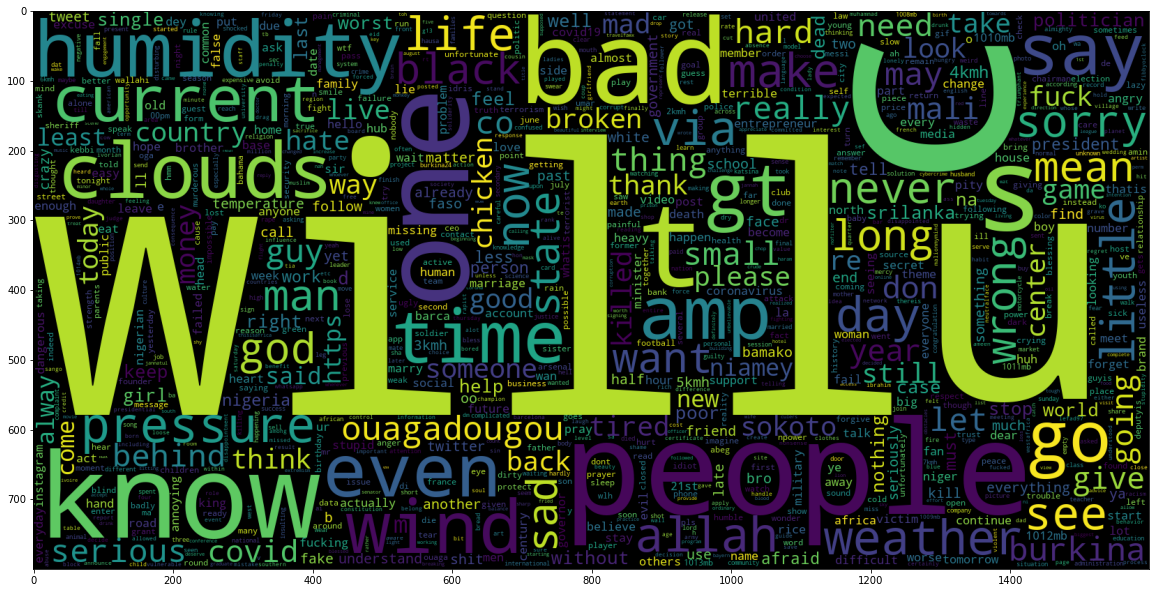

In [80]:
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(negatives_tweets))
plt.figure(figsize = (20,20))
plt.imshow(wc)